<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Korrelyaciya_i_korrelyacionnyj_analiz/DZ_Kondrstev_STPY-48_Korrelyaciya_i_regressiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Преподаватель:** Олег Булыгин

### **Домашнее задание к лекции «Корреляция и корреляционный анализ»**

Возьмите датасет Mortality and Water Hardness**

www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**

**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


**Задание 2.**

**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

## Задание 1.
Проверяем есть ли связь между жёсткостью воды и средней годовой смертностью.

 **Описание столбцов датафрейма:**

- `Unnamed`: 0: порядковый номер записи
- `location`: местоположение города (South - южные города, North - северные города)
- `town`: название города
- `mortality`: средняя годовая смертность на 100000 населения
- `hardness`: концентрация кальция в питьевой воде

Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Импорт библиотек

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Korrelyaciya_i_korrelyacionnyj_analiz/water.csv')
# Загружаем данные

In [3]:
data
# Смотрим наш дата фрейм

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [4]:
data.info()
# Смотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


### Первичное изучение данных

### Анализ категориальных столбцов

Категориальные столбцы:
- `location`: местоположение, которое может принимать значение "South" или "North"
- `town`: город, представленный текстовыми значениями

In [5]:
# Посчитаем количество уникальных значений в столбце "location" и их доли:
location_counts = data['location'].value_counts()
location_percentage = data['location'].value_counts(normalize=True) * 100
print("Уникальные значения в столбце 'location':")
print(location_counts)
print()
print("Доля каждой категории в столбце 'location':")
print(location_percentage)
print()

# Провериv соответствие уникальных значений в столбце "location" с описанием данных:
expected_location_categories = ['South', 'North']
if set(data['location'].unique()) == set(expected_location_categories):
    print("Уникальные значения в столбце 'location' соответствуют описанию данных.")
else:
    print("Уникальные значения в столбце 'location' не соответствуют описанию данных.")

Уникальные значения в столбце 'location':
North    35
South    26
Name: location, dtype: int64

Доля каждой категории в столбце 'location':
North    57.377049
South    42.622951
Name: location, dtype: float64

Уникальные значения в столбце 'location' соответствуют описанию данных.


### Анализ непрерывных величин




Непрерывные величины:
- `mortality`: смертность (целевая переменная), числовая величина
- `hardness`: концентрация кальция в питьевой воде

Базовые статистики

In [6]:
mortality_stats = data['mortality'].describe()
hardness_stats = data['hardness'].describe()

print("Статистика по столбцу 'mortality':")
print(mortality_stats)
print("\nСтатистика по столбцу 'hardness':")
print(hardness_stats)


Статистика по столбцу 'mortality':
count      61.000000
mean     1524.147541
std       187.668754
min      1096.000000
25%      1379.000000
50%      1555.000000
75%      1668.000000
max      1987.000000
Name: mortality, dtype: float64

Статистика по столбцу 'hardness':
count     61.000000
mean      47.180328
std       38.093966
min        5.000000
25%       14.000000
50%       39.000000
75%       75.000000
max      138.000000
Name: hardness, dtype: float64


Анализ статистики столбца `mortality` позволяет предположить, что распределение данных в нем скорее всего не является нормальным. Это подтверждается небольшим отличием среднего значения от медианы, большим значением стандартного отклонения и широким диапазоном значений.


Анализ статистики столбца `hardness` позволяет предположить, что распределение данных в нем скорее всего не является нормальным. Это подтверждается небольшим отличием среднего значения от медианы, большим значением стандартного отклонения и широким диапазоном значений.

### Корреляция

Посмотрим на график взаимосвязи между жёсткостью воды и средней годовой смертностью

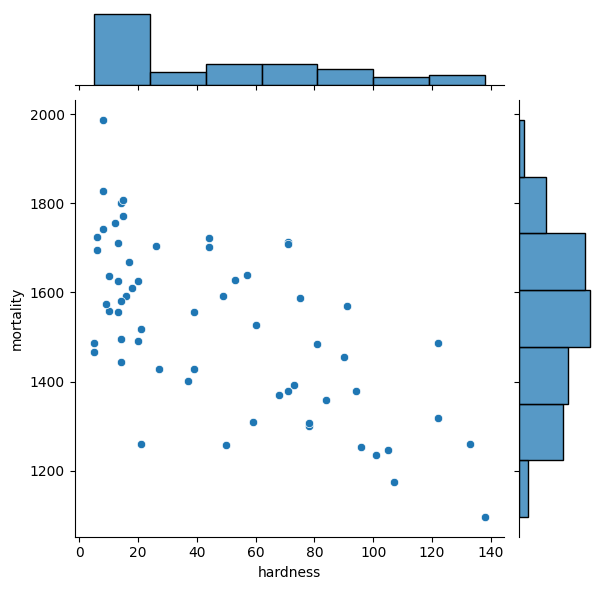

In [7]:
sns.jointplot(x='hardness', y='mortality', data=data)
plt.show()

In [8]:
# Коэффициент корреляции Пирсона
corr_p = data['hardness'].corr(data['mortality'], method='pearson')
corr_p

-0.6548486232042463

Результат коэффициента корреляции Пирсона (-0.6548486232042463) показывает наличие отрицательной корреляционной связи между переменными `hardness` (жесткость воды) и `mortality` (смертность).

Отрицательное значение коэффициента корреляции означает, что при увеличении значений одной переменной, значения другой переменной снижаются. В данном случае, при увеличении жесткости воды, смертность снижается.

Анализ коэффициента корреляции Пирсона может предоставить следующую информацию:
- Корреляционная связь: Коэффициент -0.65 указывает на среднюю отрицательную корреляционную связь между жесткостью воды и смертностью. Это означает, что чем выше уровень жесткости воды, тем ниже смертность.
- Сила связи: Значение коэффициента -0.65 говорит о том, что связь между переменными средней силы. Связь не является сильной, но она все равно значима и может быть использована для анализа и прогнозирования.
- Направление связи: Отрицательное значение коэффициента означает, что при увеличении одной переменной (жесткости воды), другая переменная (смертность) снижается.

In [9]:
# Коэффициент корреляции Спирмена
corr_s = data['hardness'].corr(data['mortality'], method='spearman')
corr_s

-0.6316646189166502

Близкое значение между коэффициентами корреляции Пирсона и Спирмена может быть обусловлено несколькими факторами:

1. Распределение данных: Коэффициент корреляции Пирсона предполагает линейную связь между переменными и зависит от распределения данных. Если данные имеют близкое к линейному распределение, то коэффициент корреляции Пирсона будет близким к коэффициенту корреляции Спирмена. В данном случае, возможно, между переменными "hardness" и "mortality" существует линейная связь, что приводит к близким значениям коэффициентов.

2. Количество выбросов: Коэффициент корреляции Спирмена более устойчив к выбросам, чем коэффициент корреляции Пирсона. Если в данных присутствуют выбросы, то коэффициент корреляции Пирсона может быть более сильно искажен, в то время как коэффициент корреляции Спирмена будет менее подвержен влиянию выбросов. Возможно, в данном наборе данных выбросы не сильно искажают связь, поэтому значение коэффициента корреляции Пирсона и Спирмена близко.

### Регрессия

Модели линейной регрессии

In [10]:
# Матрица признаков `X` и вектор целевой переменной `y`.
X = data[['hardness']]
y = data['mortality']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Коэффициенты регрессии
print('Коэффициенты регрессии:', model.coef_)

# Пересечение с осью y (то есть y, когда X=0)
print('Пересечение с осью "y":', model.intercept_)

Коэффициенты регрессии: [-3.31576799]
Пересечение с осью "y": 1678.9405326885008


Результаты модели линейной регрессии можно проанализировать следующим образом:

1. Коэффициенты регрессии (Coefficients):
   - В данном случае получен один коэффициент регрессии, равный -3.31576799. Коэффициент регрессии показывает, как изменение одной единицы независимой переменной влияет на зависимую переменную. В данном случае, увеличение значения независимой переменной на 1 сопровождается уменьшением зависимой переменной примерно на 3.316.

2. Пересечение с осью y (Intercept):
   - Значение пересечения с осью y, то есть значение зависимой переменной, когда значение независимой переменной равно нулю, составляет 1678.94. Это означает, что при отсутствии независимых переменных значение зависимой переменной будет около 1679.

Оценка значений коэффициентов и пересечения с осью y помогают понять, как независимые переменные влияют на зависимую переменную в модели линейной регрессии.

In [11]:
# Получение прогнозов на тестовой выборке
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [12]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
Name: mortality, dtype: int64

Построим `scatter plot` (диаграмму рассеяния) с линейной линией, предсказывающей значения переменной `y`.

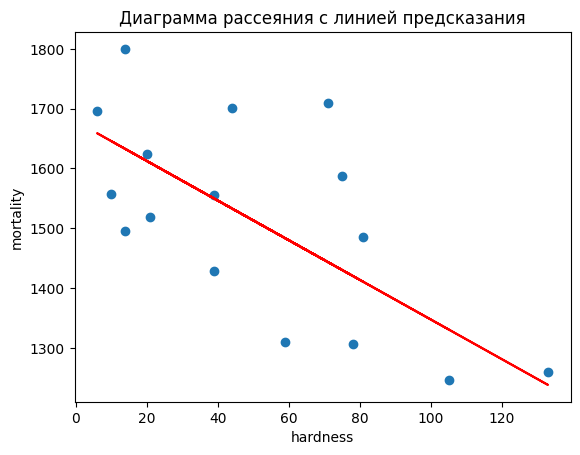

In [13]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel("hardness")
plt.ylabel("mortality")
plt.title("Диаграмма рассеяния с линией предсказания")
plt.show()

In [14]:
# Расчет коэффициента детерминации
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')

R2: 0.410213439338294


Посмотрим на остатки

In [15]:
diff = y_test - y_pred
diff.describe()

count     16.000000
mean       6.275486
std      131.246049
min     -174.310221
25%      -96.059711
50%        8.874623
75%       95.163023
max      265.478995
Name: mortality, dtype: float64

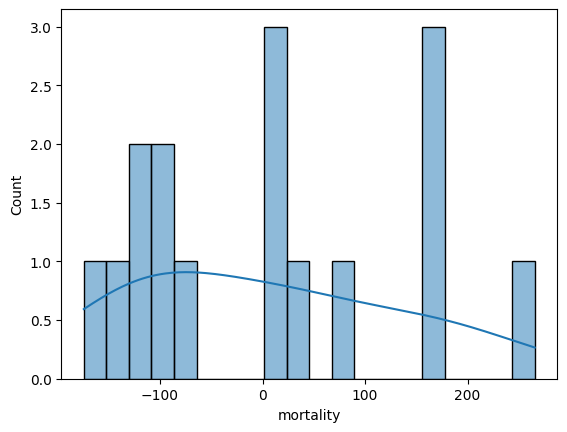

In [16]:
sns.histplot((y_test-y_pred), kde=True, bins=20)
plt.show()

In [17]:
pd.DataFrame(model.coef_ , X.columns, columns=['Коэффициенты'])

,Коэффициенты
hardness,-3.315768


Интерпретация этих результатов позволяет оценить распределение и разброс значений разницы между `y_test` и `y_pred`. Например, среднее значение 6.275486 указывает на небольшое смещение в положительную сторону, в то время как стандартное отклонение 131.246049 указывает на значительный разброс значений разницы. Процентили также позволяют понять, как распределены значения разницы относительно положительного и отрицательного направлений.

Модель недостаточно точна, то есть не в состоянии правильно предсказать значения целевой переменной y, разница между реальными значениями (y_test) и предсказанными значениями (y_pred) значительно различаются.


Недостаточное количество признаков, приводят к большим различиям между фактическими и предсказанными значениями.


## Задание 2.

Проверим сохраняется ли аналогичная зависимость для северных и южных городов по отдельности.

### Подготовка данных

In [18]:
# Разбиение датафрейма на поднаборы по значению столбца "location"
df_south = data[data['location'] == 'South']
df_north = data[data['location'] == 'North']
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [19]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


### Сравниваем базовые статистики

In [20]:
mortality_stats = data['mortality'].describe()
mortality_stats_df_south = df_south['mortality'].describe()
mortality_stats_df_north = df_north['mortality'].describe()

print("Статистика по столбцу 'mortality' общяя:")
print(mortality_stats)
print("\nСтатистика по столбцу 'mortality' для South:")
print(mortality_stats_df_south)
print("\nСтатистика по столбцу 'mortality' для North:")
print(mortality_stats_df_north)

Статистика по столбцу 'mortality' общяя:
count      61.000000
mean     1524.147541
std       187.668754
min      1096.000000
25%      1379.000000
50%      1555.000000
75%      1668.000000
max      1987.000000
Name: mortality, dtype: float64

Статистика по столбцу 'mortality' для South:
count      26.000000
mean     1376.807692
std       140.269175
min      1096.000000
25%      1259.250000
50%      1364.000000
75%      1485.750000
max      1627.000000
Name: mortality, dtype: float64

Статистика по столбцу 'mortality' для North:
count      35.000000
mean     1633.600000
std       136.936911
min      1378.000000
25%      1557.500000
50%      1637.000000
75%      1718.000000
max      1987.000000
Name: mortality, dtype: float64


Исходя из данных статистики по столбцу 'mortality', можно сделать следующие выводы:

1. Общая средняя смертность во всех городах составляет 1524.15. Это значение является средним показателем и указывает на общий уровень смертности в рассматриваемых городах.

2. Стандартное отклонение, равное 187.67, показывает разброс значений смертности в выборке. Это означает, что некоторые города могут иметь значительно высокий или низкий уровень смертности по сравнению с общим средним значением.

3. Минимальное значение смертности составляет 1096 и максимальное значение - 1987. Это указывает на разнообразие в уровне смертности между разными городами.

4. При анализе данных по регионам, можно заметить, что средний уровень смертности в южных городах (1376.81) ниже, чем в северных городах (1633.6). Также, стандартное отклонение для южных городов (140.27) ниже, чем для северных городов (136.94). Это говорит о том, что смертность в южных городах имеет меньший разброс значений, и в целом смертность в этом регионе склонна быть ниже, чем в северных городах.

In [21]:
hardness_stats = data['hardness'].describe()
hardness_stats_df_south = df_south['hardness'].describe()
hardness_stats_df_north = df_north['hardness'].describe()

print("\nСтатистика по столбцу 'hardness' общая:")
print(hardness_stats)
print("\nСтатистика по столбцу 'hardness' для South:")
print(hardness_stats_df_south)
print("\nСтатистика по столбцу 'hardness' для North:")
print(hardness_stats_df_north)


Статистика по столбцу 'hardness' общая:
count     61.000000
mean      47.180328
std       38.093966
min        5.000000
25%       14.000000
50%       39.000000
75%       75.000000
max      138.000000
Name: hardness, dtype: float64

Статистика по столбцу 'hardness' для South:
count     26.000000
mean      69.769231
std       40.360682
min        5.000000
25%       40.250000
50%       75.500000
75%       99.750000
max      138.000000
Name: hardness, dtype: float64

Статистика по столбцу 'hardness' для North:
count    35.000000
mean     30.400000
std      26.134494
min       6.000000
25%      12.500000
50%      17.000000
75%      44.000000
max      94.000000
Name: hardness, dtype: float64


Исходя из данных статистики по столбцу 'hardness', можно сделать следующие выводы:

1. Общее среднее значение жесткости воды составляет 47.18. Это указывает на средний уровень жесткости в рассматриваемых городах.

2. Стандартное отклонение, равное 38.09, показывает разброс значений жесткости воды в выборке. Это означает, что некоторые города могут иметь очень низкую или высокую жесткость воды по сравнению с общим средним значением.

3. Минимальное значение жесткости воды составляет 5, а максимальное значение - 138. Это указывает на вариативность уровня жесткости воды между разными городами.

4. При анализе данных по регионам, можно заметить, что средний уровень жесткости воды в южных городах (69.77) выше, чем в северных городах (30.4). Также, стандартное отклонение для южных городов (40.36) больше, чем для северных городов (26.13). Это говорит о том, что уровень жесткости воды в южных городах имеет больший разброс значений и склонен быть выше, чем в северных городах.

### Корреляция

#### Корреляция жесткости воды со смертностью южных округах

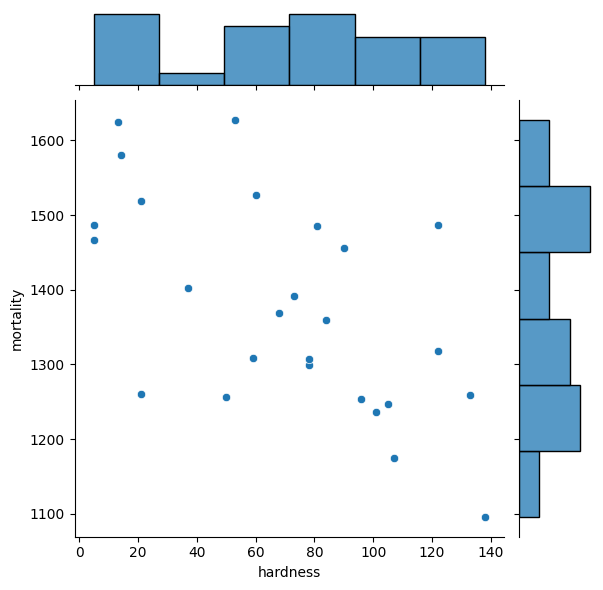

In [22]:
sns.jointplot(x='hardness', y ='mortality', data=df_south)
plt.show()

####Корреляция жесткости воды со смертностью в северных округах

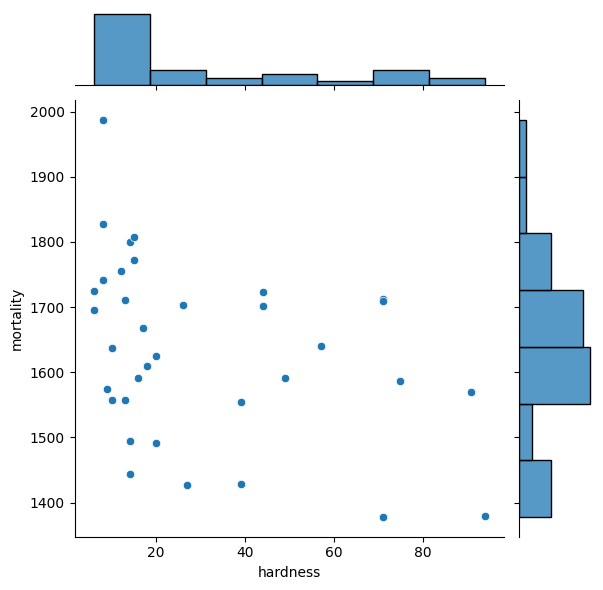

In [23]:
sns.jointplot(x='hardness', y ='mortality', data=df_north)
plt.show()

In [24]:
# Коэффициент корреляции Пирсона общая (для северных и южных округов)
corr_p = data['hardness'].corr(data['mortality'], method='pearson')
corr_p

-0.6548486232042463

In [25]:
# Коэффициент корреляции Пирсона для South
corr_p_df_south = df_south['hardness'].corr(df_south['mortality'], method='pearson')
corr_p_df_south

-0.6021532715484156

In [26]:
# Коэффициент корреляции Пирсона для North
corr_p_df_north = df_north['hardness'].corr(df_north['mortality'], method='pearson')
corr_p_df_north

-0.3685978383288718

In [27]:
# Коэффициент корреляции Спирмена для South
corr_s_df_south = df_south['hardness'].corr(df_south['mortality'], method='spearman')
corr_s_df_south

-0.5957229185013566

In [28]:
# Коэффициент корреляции Спирмена для North
corr_s_df_north = df_north['hardness'].corr(df_north['mortality'], method='spearman')
corr_s_df_north

-0.4042078956511175

Вывод:
Оба метода корреляции (Пирсона и Спирмена) показывают, что в южных и северных округах существует обратная связь между жесткостью воды и смертностью. Однако эта связь более выражена в южных округах, где жесткая вода связана с более низким уровнем смертности. В северных округах эта связь слабее и менее значительна.

Общая корреляция (-0.655 по коэффициенту Пирсона и -0.632 по коэффициенту Спирмена) между жесткостью воды и смертностью показывает, что существует более сильная обратная связь между этими двумя переменными.

Возможно, это объясняется тем, что включение данных из обоих округов увеличивает общий объем выборки, что повышает статистическую мощность и уменьшает вероятность случайных ошибок. Также можно предположить, что различия в северных и южных округах вносят вклад в общую корреляцию, усиливая связь между переменными.


### Регрессия

In [29]:
# Модели линейной регрессии для юга
X = df_south[['hardness']]
y = df_south['mortality']

X_train_df_south, X_test_df_south, y_train_df_south, y_test_df_south = train_test_split(X, y, random_state=42)

model_df_south = LinearRegression()

model_df_south.fit(X_train_df_south, y_train_df_south)

print('Коэффициенты регрессии для юга:', model_df_south.coef_)
print('Пересечение с осью "y" для юга:', model_df_south.intercept_)

Коэффициенты регрессии для юга: [-3.12141428]
Пересечение с осью "y" для юга: 1604.266282879566


In [30]:
# Модели линейной регрессии для севера
X = df_north[['hardness']]
y = df_north['mortality']

X_train_df_north, X_test_df_north, y_train_df_north, y_test_df_north = train_test_split(X, y, random_state=42)

model_df_north = LinearRegression()

model_df_north.fit(X_train_df_north, y_train_df_north)

print('Коэффициенты регрессии для севера:', model_df_north.coef_)
print('Пересечение с осью "y" для севера:', model_df_north.intercept_)

Коэффициенты регрессии для севера: [-2.14659196]
Пересечение с осью "y" для севера: 1691.0175604303595


In [31]:
# Коэффициенты регрессии общие
print('Коэффициенты регрессии для севера и юга:', model.coef_)

# Пересечение с осью y (то есть y, когда X=0)
print('Пересечение с осью "y" для севера и юга:', model.intercept_)

Коэффициенты регрессии для севера и юга: [-3.31576799]
Пересечение с осью "y" для севера и юга: 1678.9405326885008


Исходя из коэффициентов регрессии и пересечений с осью `y`, можно сделать следующие выводы:
- Коэффициенты регрессии для юга и севера имеют отрицательные значения, что означает, что увеличение значения признака ведет к уменьшению значения целевой переменной.
- Пересечения с осью `y` для юга, севера и севера и юга показывают базовое значение целевой переменной при значениях признаков равных нулю.
- Значение коэффициента регрессии для севера и юга вместе взятых (-3.31576799) выше, чем для каждого региона по отдельности (юг: -3.12141428, север: -2.14659196), что может указывать на усиленное влияние признаков при объединении данных из обоих регионов.

In [32]:
# Получение прогнозов на тестовой выборке (общий)
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [33]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
Name: mortality, dtype: int64

In [34]:
# Получение прогнозов на тестовой выборке для юга
y_pred_df_south = model_df_south.predict(X_test_df_south)
y_pred_df_south

array([1223.45374102, 1588.65921149, 1276.51778374, 1223.45374102,
       1488.77395461, 1538.71658305, 1420.10284051])

In [35]:
y_test_df_south

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
Name: mortality, dtype: int64

In [36]:
# Получение прогнозов на тестовой выборке для севера
y_pred_df_north = model_df_north.predict(X_test_df_north)
y_pred_df_north

array([1673.84482478, 1671.69823282, 1660.96527304, 1678.13800869,
       1656.67208912, 1538.60953151, 1596.56751434, 1673.84482478,
       1607.30047412])

In [37]:
y_test_df_north

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
Name: mortality, dtype: int64

Можно провести следующие наблюдения:

1. Для южных регионов (`y_pred_df_south`) модель в целом показывает недооценку смертности, так как большинство предсказанных значений ниже фактических значений.
2. Для северных регионов (`y_pred_df_north`) модель также недооценивает смертность, но различия между предсказанными и фактическими значениями не такие значительные.
3. Для общей выборки (`y_pred`) модель снова склонна недооценивать смертность, но есть случаи как недооценки, так и переоценки.

#### Построим `scatter plot` (диаграмму рассеяния) с линейной линией, предсказывающей значения переменной `y`.

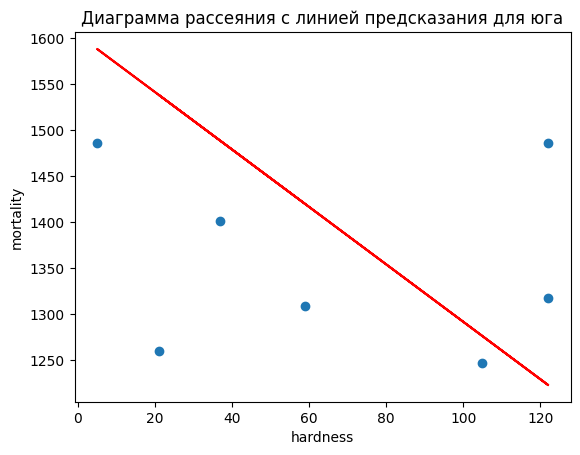

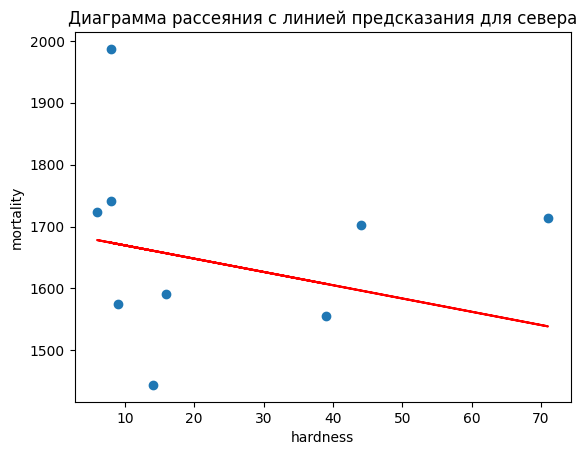

In [38]:
# Диаграмма рассеяния с линией предсказания для юга
plt.scatter(X_test_df_south, y_test_df_south)
plt.plot(X_test_df_south, y_pred_df_south, c='r')
plt.xlabel("hardness")
plt.ylabel("mortality")
plt.title("Диаграмма рассеяния с линией предсказания для юга")
plt.show()

# Диаграмма рассеяния с линией предсказания для севера
plt.scatter(X_test_df_north, y_test_df_north)
plt.plot(X_test_df_north, y_pred_df_north, c='r')
plt.xlabel("hardness")
plt.ylabel("mortality")
plt.title("Диаграмма рассеяния с линией предсказания для севера")
plt.show()

#### Посмотрим на остатки

In [39]:
diff_df_south = y_test_df_south - y_pred_df_south

diff_df_north = y_test_df_north - y_pred_df_north

print("Статистика по югу:")
print(diff_df_south.describe())
print("\nСтатистика по северу:")
print(diff_df_north.describe())
print("\nСтатистика общая:")
print(diff.describe())

Статистика по югу:
count      7.000000
mean     -35.953979
std      172.137261
min     -278.716583
25%     -106.881026
50%      -86.773955
75%       32.514238
max      262.546259
Name: mortality, dtype: float64

Статистика по северу:
count      9.000000
mean      30.484359
std      158.763201
min     -216.965273
25%      -65.672089
50%       45.861991
75%      105.432486
max      313.155175
Name: mortality, dtype: float64

Статистика общая:
count     16.000000
mean       6.275486
std      131.246049
min     -174.310221
25%      -96.059711
50%        8.874623
75%       95.163023
max      265.478995
Name: mortality, dtype: float64


### Построим гистограммы распределения разницы между фактическими значениями и предсказанными значениями

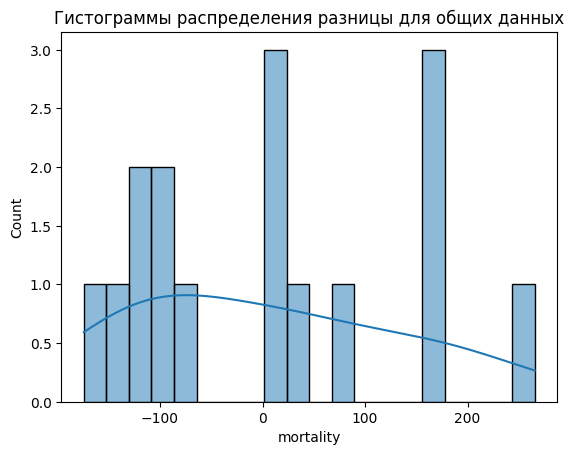

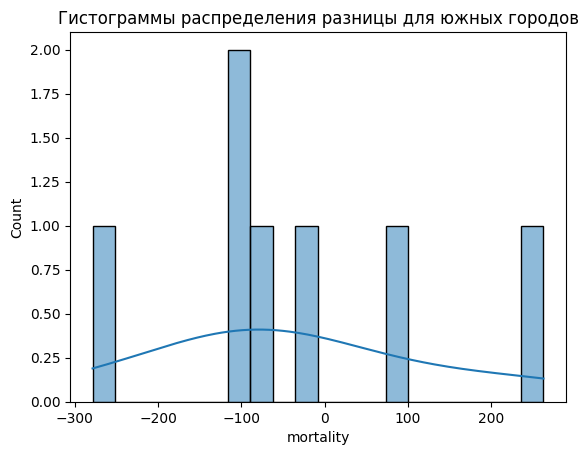

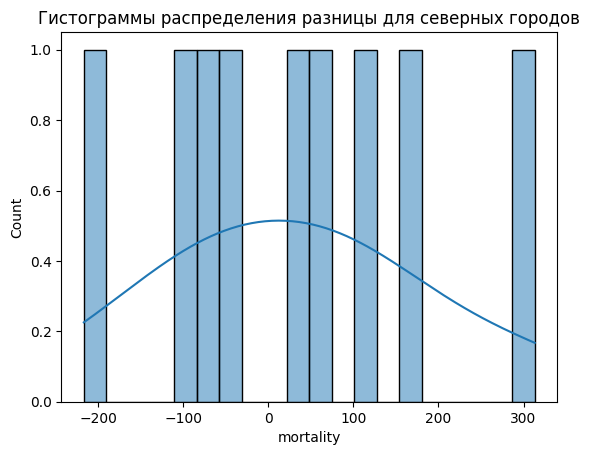

In [42]:
sns.histplot((y_test-y_pred), kde=True, bins=20)
plt.title("Гистограммы распределения разницы для общих данных")
plt.show()

sns.histplot((y_test_df_south - y_pred_df_south), kde=True, bins=20)
plt.title("Гистограммы распределения разницы для южных городов")
plt.show()

sns.histplot((y_test_df_north - y_pred_df_north), kde=True, bins=20)
plt.title("Гистограммы распределения разницы для северных городов")
plt.show()